In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

root_dir = "Fruit Count/fruits-360"
for dirname, _, filenames in os.walk(root_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Activation,Dropout,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img


In [5]:
train_path = "fruits-360\\Training\\"
test_path = "fruits-360\\Test\\"

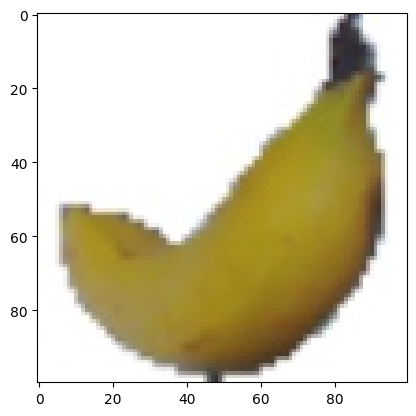

In [6]:
img = load_img("fruits-360\\Training\\Banana\\4_100.jpg")
plt.imshow(img)
plt.axis("on")
plt.show()

# img = load_img("fruits-360\\Training\\Banana\\4_100.jpg")

In [7]:
img = img_to_array(img)
img.shape

(100, 100, 3)

In [8]:
model = Sequential()
model.add(Conv2D(128, 3, activation="relu", input_shape=(100, 100, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, activation="relu"))
model.add(Conv2D(32, 3, activation="relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.50))
model.add(Flatten())
model.add(Dense(5000, activation="relu"))
model.add(Dense(1000, activation="relu"))
model.add(Dense(131, activation="softmax"))
model.summary()

c:\Users\srishti\OneDrive\Desktop\Fruit Count\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5000)           │    77,445,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1000)           │     5,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 131)            │       131,131 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,672,971 (315.37 MB)

 Trainable params: 82,672,971 (315.37 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.3,
    horizontal_flip=True,
    vertical_flip=False,
    zoom_range=0.3,
)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(100, 100),
    batch_size=32,
    color_mode="rgb",
    class_mode="categorical",
)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(100, 100),
    batch_size=32,
    color_mode="rgb",
    class_mode="categorical",
)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [11]:
pip install scipy

In [12]:
hist = model.fit(
    x=train_generator,
    steps_per_epoch=50,
    epochs=50,
    validation_data=test_generator,
    validation_steps=50,
)

Epoch 1/50


c:\Users\srishti\OneDrive\Desktop\Fruit Count\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.0063 - loss: 4.8784 - val_accuracy: 0.0162 - val_loss: 4.8671
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.0100 - loss: 4.8710 - val_accuracy: 0.0219 - val_loss: 4.8512
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.0168 - loss: 4.8559 - val_accuracy: 0.0369 - val_loss: 4.8224
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 204s 4s/step - accuracy: 0.0197 - loss: 4.8298 - val_accuracy: 0.0394 - val_loss: 4.7738
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 896ms/step - accuracy: 0.0392 - loss: 4.7628 - val_accuracy: 0.0413 - val_loss: 4.6327
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 48s 960ms/step - accuracy: 0.0431 - loss: 4.6346 - val_accuracy: 0.0575 - val_loss: 4.3448
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 588ms/step - accuracy: 0.0438 - loss: 4.4100 - val_accuracy: 0.0688 - val_loss: 4.0818
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 709ms/step - accuracy: 0.0581 - loss: 4.1853 - val_accuracy: 0.0950 - val_los

C:\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


50/50 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.1739 - loss: 3.0374 - val_accuracy: 0.3006 - val_loss: 2.6034
Epoch 17/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 47s 940ms/step - accuracy: 0.2604 - loss: 2.7575 - val_accuracy: 0.3125 - val_loss: 2.4303
Epoch 18/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 922ms/step - accuracy: 0.2591 - loss: 2.7415 - val_accuracy: 0.3650 - val_loss: 2.2962
Epoch 19/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 930ms/step - accuracy: 0.2633 - loss: 2.6327 - val_accuracy: 0.3731 - val_loss: 2.3122
Epoch 20/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 783ms/step - accuracy: 0.3328 - loss: 2.4546 - val_accuracy: 0.3950 - val_loss: 2.1618
Epoch 21/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 483ms/step - accuracy: 0.3185 - loss: 2.3591 - val_accuracy: 0.3631 - val_loss: 2.3992
Epoch 22/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 706ms/step - accuracy: 0.3398 - loss: 2.3334 - val_accuracy: 0.4675 - val_loss: 1.8288
Epoch 23/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 36s 719ms/step - accuracy: 0.3861 - loss: 2.1245 - val_accuracy: 0

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


# Plot training and validation accuracy
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
from keras.models import load_model

model.save("Fruitmodel.h5")

In [14]:
import tensorflow as tf

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [15]:
test_generator.classes[22687]

130

In [16]:
predictions = probability_model.predict(test_generator)

709/709 ━━━━━━━━━━━━━━━━━━━━ 167s 235ms/step


In [17]:
b = predictions[8]
print(b)

[0.00753606 0.00753606 0.00753606 0.00753606 0.00753606 0.00753606
 0.00753606 0.00753606 0.00753606 0.00753792 0.00753606 0.00753606
 0.00753606 0.00753606 0.00753606 0.00753606 0.00753606 0.00753606
 0.00753606 0.00753607 0.00753606 0.00753606 0.00753606 0.00753607
 0.00753606 0.00754148 0.00753606 0.00753606 0.00753606 0.00753606
 0.00753606 0.00753606 0.00753606 0.00753606 0.00753654 0.00753606
 0.00753606 0.00753606 0.00753606 0.00753606 0.00753606 0.00753606
 0.00753831 0.00753606 0.00753606 0.00753606 0.00753606 0.00753606
 0.00753606 0.00753606 0.00753606 0.00753606 0.00753606 0.0075755
 0.00753606 0.00753606 0.00753633 0.00753606 0.00753606 0.00753606
 0.00753606 0.00753606 0.00753614 0.00753606 0.00753606 0.00753606
 0.00753606 0.00753606 0.00753606 0.00753606 0.00753606 0.00753606
 0.00753606 0.00753621 0.00755109 0.00753607 0.00753705 0.00753606
 0.00753606 0.00753606 0.00753606 0.00753606 0.00753609 0.00753606
 0.00753608 0.00753607 0.00753607 0.00753606 0.00753606 0.00753

To Check the accuracy of the model

In [20]:
pip install scikit-learn


  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 163.8 kB/s eta 0:01:05
   ---------------------------------------- 0.0/10.6 MB 163.8 kB/s eta 0:01:05
   ---------------------------------------- 0.0/10.6 MB 163.8 kB/s eta 0:01:05
   ---------------------------------------- 0.0/10.6 MB 163.8 kB/s eta 0:01:05
   ---------------------------------------- 0.0/10.6 MB 163.8 kB/s eta 0:01:05
   ---------------------------------------- 0.1/10.6 MB 100.9 kB/s eta 0:01:45
   ---------------------------------------

In [21]:
from sklearn.metrics import accuracy_score

709/709 ━━━━━━━━━━━━━━━━━━━━ 188s 262ms/step - accuracy: 0.8058 - loss: 0.5824
Test Loss: 0.5864262580871582
Test Accuracy: 0.8046103715896606


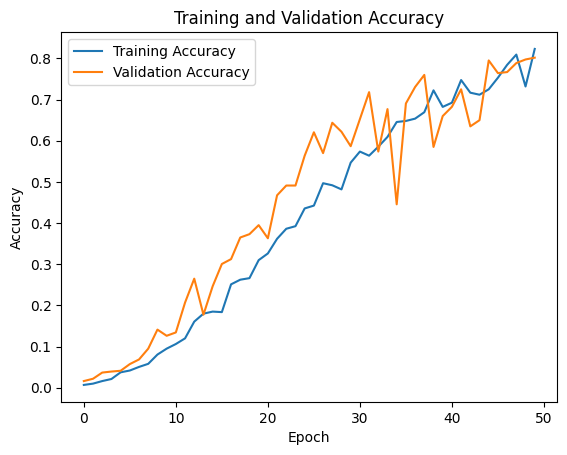

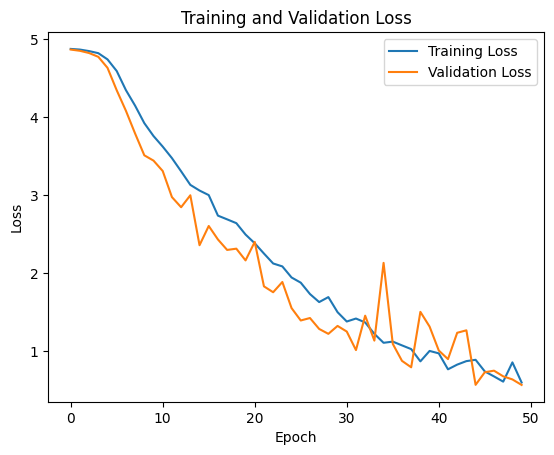

In [23]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


# Plot training and validation accuracy
plt.plot(hist.history["accuracy"], label="Training Accuracy")
plt.plot(hist.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(hist.history["loss"], label="Training Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [18]:
np.argmax(b)

129

In [19]:
import os

folder = "fruits-360\\Test\\"

sub_folders = [
    name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder, name))
]

print(sub_folders[26])

Cherry 1


import os


def count_fruit_images(directory):
    fruit_counts = {}
    for fruit_class in os.listdir(directory):
        fruit_class_path = os.path.join(directory, fruit_class)
        if os.path.isdir(fruit_class_path):  # Check if it's a directory
            fruit_count = len(os.listdir(fruit_class_path))
            fruit_counts[fruit_class] = fruit_count
    return fruit_counts


test_dir = "fruits-360\\Test"
fruit_counts = count_fruit_images(test_dir)
print(fruit_counts)

import os

# Define the path to your training dataset directory
training_path = "fruits-360\\Training\\"

# Extract class labels from subfolder names
class_labels = sorted(os.listdir(training_path))

print("Class Labels:", class_labels)

from keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Step 1: Specify the path to the random image
random_image_path = "fruits-360\\multiple_fruits\\apple.jpg"


# Step 2: Load the image
img = load_img(
    random_image_path, target_size=(100, 100)
)  # Assuming your model expects 100x100 images

# Step 3: Preprocess the image
img_array = img_to_array(img)
img_array = img_array.reshape((1,) + img_array.shape)
img_array = img_array / 255.0  # Normalize pixel values

# Step 4: Apply Fruit Recognition
predicted_probabilities = model.predict(img_array)
predicted_class_index = np.argmax(predicted_probabilities)
predicted_fruit = class_labels[predicted_class_index]  # Assuming class_labels is a list containing class names

# Assuming class_labels is a list containing class names

# Step 5: Display the Result
print("Predicted Fruit:", predicted_fruit)

# If available, also print the fruit count
#if predicted_fruit in fruit_counts:
print("Fruit Count:", fruit_counts[predicted_fruit])
#else:
    #print("Fruit count not available for", predicted_fruit)